Introduction to Data Science - Assignment 2
By Marissa Beaty

Section 1

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import statistics
from scipy import stats
from sklearn import preprocessing
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
#Uploading the data
dataset = pd.read_csv("Assignment_2_Dataset_Top_100_streamed.csv")

In [4]:
#showing the dataset
display(dataset[:10])


,title,artist,top genre,year,beats.per.minute,energy,danceability,loudness.dB,liveness,valance,length,acousticness,speechiness,popularity
0,Blinding Lights,The Weeknd,canadian contemporary r&b,2020,171,73,51,-6,9,33,200,0,6,91
1,Watermelon Sugar,Harry Styles,pop,2019,95,82,55,-4,34,56,174,12,5,88
2,Mood (feat. iann dior),24kGoldn,cali rap,2021,91,72,70,-4,32,73,141,17,4,88
3,Someone You Loved,Lewis Capaldi,pop,2019,110,41,50,-6,11,45,182,75,3,86
4,Perfect,Ed Sheeran,pop,2017,95,45,60,-6,11,17,263,16,2,86
5,Believer,Imagine Dragons,modern rock,2017,125,78,78,-4,8,67,204,6,13,86
6,lovely (with Khalid),Billie Eilish,electropop,2018,115,30,35,-10,10,12,200,93,3,86
7,Circles,Post Malone,dfw rap,2019,120,76,70,-3,9,55,215,19,4,86
8,Shape of You,Ed Sheeran,pop,2017,96,65,83,-3,9,93,234,58,8,85
9,Memories,Maroon 5,pop,2021,91,33,78,-7,8,60,189,84,6,85


In [4]:
#Pulling the "Beats per Minute" and "Danceability" Column from the Dataset

beats_per_min = dataset["beats.per.minute"]
danceability = dataset["danceability"]

Summarize the data. Are there any outliers we need to clean up? 

The data we are looking at is a part of a larger dataset called "Top 100 Streamed." This dataset lists numerical details of the Top 100 most streamed songs on Spotify. These numerical categories refer to beats per minute, danceability, length, valance, etc. Each category has a different scale that best encapsulates that category. For example, the numerical values in length are the number of seconds that song requires to go from the beginning to the end. This is different than something such as Energy or Valance, which are valued on a scale of 0 (being low or containing that quality in low quantities) and 100 (being high or containing that quality in high quantities). 

For this assignment, I will be looking more in depth at the Beats Per Minute and the Danceability columns to determine if there is a relationship between the two. Upon initial review, there do not appear to be any outliers that would skew the data, so I will move forward with analyzing the data and fitting the various models. 

In [5]:
#finding the means, mean, etc. i.e. representations of the data

#Beats Per Minute
BPM_min = beats_per_min.min()
BPM_max = beats_per_min.max()
BPM_median = beats_per_min.median()
BPM_mode = statistics.mode(beats_per_min)
BPM_mean = sum(beats_per_min) / len(beats_per_min)
BPM_range = BPM_max - BPM_min
BPM_STD = beats_per_min.std()

print("Beats per Minute minimum: ")
print(BPM_min)

print("Beats per Minute maximum: ")
print(BPM_max)

print("Beats per Minute median: ")
print(BPM_median)

print("Beats per Minute mode: ")
print(BPM_mode)

print("Beats per Minute mean: ")
print(BPM_mean)

print("Beats per Minute range: ")
print(BPM_range)

print("Beats per Minute standard deviation: ")
print(BPM_STD)

Beats per Minute minimum: 
71
Beats per Minute maximum: 
186
Beats per Minute median: 
115.0
Beats per Minute mode: 
90
Beats per Minute mean: 
116.97
Beats per Minute range: 
115
Beats per Minute standard deviation: 
27.470628943390693


In [6]:
#Danceability
dance_min = danceability.min()
dance_max = danceability.max()
dance_median = danceability.median()
dance_mode = statistics.mode(danceability)
dance_mean = sum(danceability) / len(danceability)
dance_range = dance_max - dance_min
dance_STD = danceability.std()

print("Danceability minimum: ")
print(dance_min)

print("Danceability maximum: ")
print(dance_max)

print("Danceability median: ")
print(dance_median)

print("Danceability mode: ")
print(dance_mode)

print("Danceability mean: ")
print(dance_mean)

print("Danceability range: ")
print(dance_range)

print("Danceability standard deviation: ")
print(dance_STD)

Danceability minimum: 
35
Danceability maximum: 
91
Danceability median: 
69.0
Danceability mode: 
75
Danceability mean: 
66.96
Danceability range: 
56
Danceability standard deviation: 
13.604010103976362


Section 2

Describe how the two categories above relate to each other. Are they correlated? How? Can we draw any conclusions from this?

From what we have observed via the scatter plot, there does not appear to be a direct link between a song's Beats Per Minute and its Danceability. This is furthered when we applied the linear model to it, and again when calculating our R and P values. With an R value of 0.104, we can conclude that the relationship between these two is not statistically significant, and in fact, the two categories show little to no correlation. You can review the results of each of these tests by reviewing the next few cells. 

 

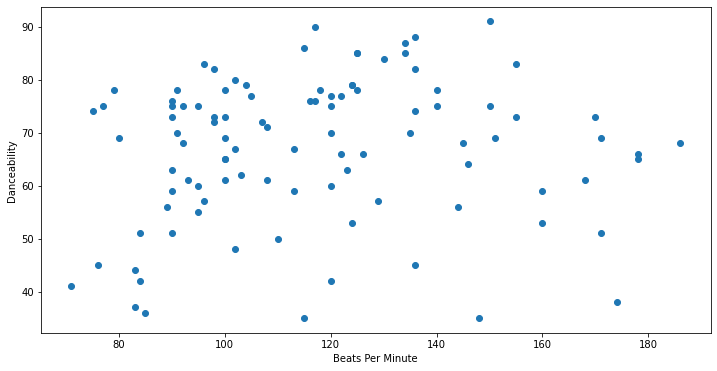

In [11]:
#plot the data - borrowed from Intro to DS Week 4 Notebook
def scatter_plot(x,y,xlabel,ylabel):
    fig, plot = plt.subplots(figsize = (12,6))
    plot.scatter(x,y)
    plot.set_ylabel(ylabel)
    plot.set_xlabel(xlabel)
    plot.ticklabel_format(style='plain')
    return plot
plot = scatter_plot(beats_per_min, danceability,"Beats Per Minute", "Danceability")


Section 3

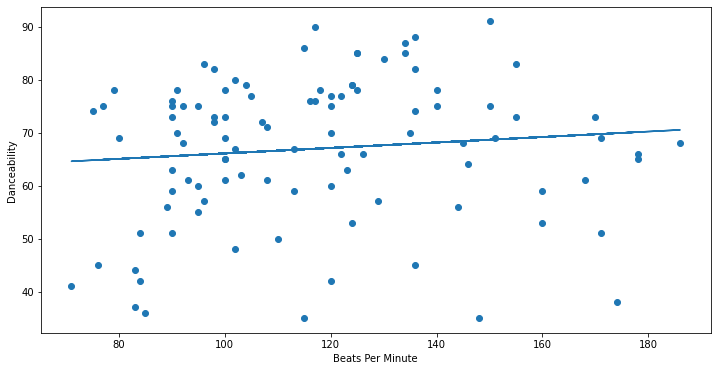

In [12]:
#fit a linear model
data = dataset[["beats.per.minute", "danceability"]].values
x = data[:,0]
y = data[:,1]
slope, intercept, r, p, std_err = stats.linregress(x, y)
slope = np.float32(slope)
model_y = [slope* i + intercept for i in x]

data_plot = scatter_plot(x, y, "Beats Per Minute", "Danceability")
data_plot.plot(x, model_y)

In [14]:
slope, intercept

(0.05158528, 60.92606986234974)

In [13]:
#finding the coefficients - borrowed from Week 4 
r, p = stats.pearsonr(beats_per_min, danceability)
print("Coefficient of Determination: ")
print(r)

print("P-Value: ")
print(p)

Coefficient of Determination: 
0.10416634947867236
P-Value: 
0.3023644732774038


Interpret the results, what can you tell about the variables from the model? Can you make any useful predictions?

As mentioned above, the results of our model appear to show little to no correlation between the Beats Per Minute and Danceability. Our R value, which measures the relationship between two variables, was 0.104. Given that 1 is positively correlated, and 0 is showing no correlation, we can conclude that the two variables selected for these tests are not statistically significant to one another. This is further proven by our P-Value of 0.302, which again, tells us that the relationship between the two variables is not statistically significant, and thus, that the model itself is likely to do a poor job at predicting Danceability based on Beats Per Minute and vice versa. 

Evaluate your model. How good is the fit?

The model itself does not appear to be a very good fit. When looking at the linear model applied to the graph, this is quite evident. The data itself is not closely arranged to the line as one would expect, rather the line cuts through the graph almost halphazardly. This is reinforced by the R- and the P-values, which as detailed above show no statistically significant relationship between the two variables. For this reason, I would not say it is the models fault for not being a good fit, rather that the data itself is not correlated in a manner which any model would be able to represent. 

Section 4

In [8]:
#Pick at least one extra independent variable and fit a multiple regression model

#third variable = valance, happiness
data_x = dataset[["beats.per.minute", "valance"]]
data_y = dataset["danceability"]


#fitting a regression model - borrowed from Week 4 Regression Task
#should I be plotting this? 
data_x = dataset[["beats.per.minute", "valance"]]
data_y = dataset["danceability"] 
regr = linear_model.LinearRegression()
regr.fit(data_x, data_y) 
print(regr.coef_, regr.intercept_,regr.score(data_x, data_y)) 

[0.03592138 0.29433074] 48.0505686456832 0.2310428769848869


In [11]:
#Predicting valance based on Beats Per Minute and Danceability

print(regr.predict([[171,51]])) #should be a valence of 33
print(regr.predict([[95,55]]))  #should be a valence of 56


[69.20399306]
[67.6512908]


/opt/miniconda3/envs/AIM/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/AIM/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


What can you tell about the variables from the model? Can you make useful predictions?

In order to test the accuracy of my model's predictive qualities, I ran the prediction model using the Beats Per Minute and Danceability of my datasets first and second entries. This way, I could confirm whether the predictive valance was near to the actual valance. As shown above, the predictive valance was in no way close to the actual valance, leaving me to conclude that the regression model used cannot make useful predictions, at least not given the variables provided. 

Section 5

What ethical issues may arise from using these models to make predictions?

When using these models, it is important to consider other factors that may have caused the results or other variables which may be correlated, despite what is represented not being so. For this example, just because the two selected variables are not correlated does not mean that others are not, or that others have not influenced that correlation (or lack thereof). I would propose that anyone wanting to use these models should do so, as they are great visualizations for modeling two variables, but should maintain the critique as to what is being left out of these models. Similarly, when using these models to make predictions, it should especially be remembered what data is included and what data is left out. For my dataset, each song has 10 categories describing the song beyond it's year, genre, and title. Each of these categories is a part of the song's datapoint, yet, when we predict, we do so with only a handful of categories. We are not seeing the full picture. 

What extra data (more variables, better variables) would improve your current models, or allow you to make better, different models? 

It would be a useful exercise to test models on the relationships of alternate variables. Though Beats Per Minute and Danceability are not correlated, perhaps Length and Danceability are, or Danceability and Energy are? I was most interested in what affects a songs danceability. Having tested this model on each aspect of the top 100 songs, perhaps a more useful representation or even a correlated set of variables would be made visible. Only after testing models on each of those relationships, would I be satisfied to admit danceability is not a mappable (or predictable) measure of a popular song. It would also be useful to try fitting more complex models beyond a linear model (such as a polynomial model) to these variables to see whether that would be of more representative of the data. I believe both approaches would be useful to better understanding and modelling the data. 